In [1]:
import os
import numpy as ny
from numpy import *
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

Contour Plot - RosenBrock Function

In [25]:
def contour_plot_rosenbrock(x_lim,y_lim,step):
    s = step
    x = ny.arange(-x_lim, x_lim, s)
    #print(x)
    y = ny.arange(-y_lim, y_lim, s)
    X,Y = ny.meshgrid(x,y)
    Z = (1-X)**2 + 100*(X**2 - Y)**2
    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X,Y,Z,ny.logspace(-3, 3, 50))

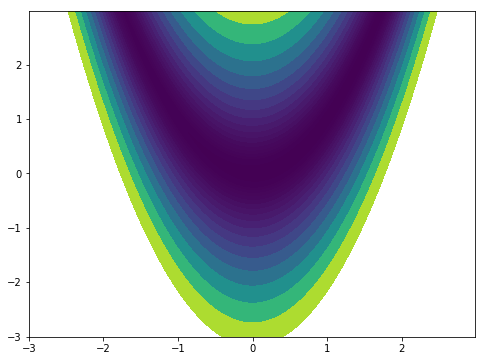

In [26]:
contour_plot_rosenbrock(3,3,0.01)

In [27]:
class SimulaledAnnealing(object):
    
    def __init__(self,temp, delTemp,freezePoint):
        self.temp = temp
        self.delTemp= delTemp
        self.freezePoint = freezePoint
    
    def cost(self,x,y):
        return 100*(x**2 -y)**2 + ((1-x)**2)

    def neighbor(self,n):
        y = []
        for i in (0,n):
            y.append(random.uniform(-2.78,2.78))
        return y

    def acceptance_probability(self,old_cost,new_cost,T):
        return ny.exp((old_cost-new_cost)/T)
 
    def anneal(self,solution):
        old_cost = self.cost(solution[0],solution[1])
        while self.temp > self.freezePoint:
            new_solution = self.neighbor(len(solution))
            new_cost = self.cost(new_solution[0],new_solution[1])
            if new_cost < old_cost:
                solution = new_solution
                old_cost = new_cost
            else:
                ap = self.acceptance_probability(old_cost, new_cost, self.temp)
                if ap > 0.5:
                    solution = new_solution
                    old_cost = new_cost
            self.temp = self.temp*self.delTemp
        return solution, old_cost
 


In [28]:
san = SimulaledAnnealing(temp = 1100,delTemp = 0.999,freezePoint = 0.0001)
init_sol = san.neighbor(2)
final_sol = san.anneal(init_sol)
print(final_sol)

([1.0155049848539295, 1.0204750478343185], 0.011851170520171686)


array([ 2.])